In [1]:
import os
import pickle
import scipy
import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def dump_pickle(data, pickle_out):
    """
    Dumps pickle.
    """
    with open(pickle_out, "wb") as f:
        pickle.dump(data, f)

def load_pickle(pickle_in):
    """
    Loads pickle.
    """
    with open(pickle_in, "rb") as f:
        data = pickle.load(f)
    return data

In [3]:
wd = "."
input_id = "ACS_XChem_hits"
in_dir = os.path.join(wd, "input", input_id)
out_dir = os.path.join(wd, "output", input_id)
results_dir = os.path.join(out_dir, "results")

In [4]:
ress_ss_dict = load_pickle(os.path.join(results_dir, '{}_ress_SS.pkl'.format(input_id)))                    # residue --> SS
ress_aa_dict = load_pickle(os.path.join(results_dir, '{}_ress_AA.pkl'.format(input_id)))                    # residue --> AA
ress_rsa_dict = load_pickle(os.path.join(results_dir, '{}_ress_RSA.pkl'.format(input_id)))                  # residue --> RSA
ress_bss_dict = load_pickle(os.path.join(results_dir, '{}_res_bss.pkl'.format(input_id)))                   # residue --> [binding sites]

lig_ress_dict = load_pickle(os.path.join(results_dir, '{}_lig_ress.pkl'.format(input_id)))                  # ligand --> [binding residues]
lig_inters_df = pd.read_pickle(os.path.join(results_dir, '{}_lig_inters.pkl'.format(input_id)))             # ligand interactions dataframe
lig_bs_dict = load_pickle(os.path.join(results_dir, '{}_lig_bs.pkl'.format(input_id)))                      # ligand --> binding site
lig_data_df = pd.read_pickle(os.path.join(results_dir, '{}_lig_data.pkl'.format(input_id)))                 # ligand dataframe

site_ress_dict = load_pickle(os.path.join(results_dir, '{}_site_ress.pkl'.format(input_id)))                # binding site --> [binding residues]
aa_profs_dict = load_pickle(os.path.join(results_dir, '{}_bss_AA_profiles.pkl'.format(input_id)))           # binding site --> [AA]
rsa_profs_dict = load_pickle(os.path.join(results_dir, '{}_bss_RSA_profiles.pkl'.format(input_id)))         # binding site --> [SS]
ss_profs_dict = load_pickle(os.path.join(results_dir, '{}_bss_SS_profiles.pkl'.format(input_id)))           # binding site --> [RSA]
rel_dist_df = pd.read_pickle(os.path.join(results_dir, '{}_rel_dist.pkl'.format(input_id)))                 # D = 1 - Irel matrix (DF)
bs_def_df = pd.read_pickle(os.path.join(results_dir, '{}_BS_def_average_i_rel_0.5.pkl'.format(input_id)))   # binding site definition
dssp_df = pd.read_pickle(os.path.join(results_dir, '{}_dssp_mapped.pkl'.format(input_id)))                  # DSSP dataframe
missense_df = pd.read_pickle(os.path.join(results_dir, '{}_missense_df.pkl'.format(input_id)))              # missense dataframe
consvar_df = pd.read_pickle(os.path.join(results_dir, '{}_ress_consvar.pkl'.format(input_id)))              # cons + var dataframe
results_df = pd.read_pickle(os.path.join(results_dir, '{}_results_table.pkl'.format(input_id)))             # final results table

#domains_file = os.path.join(results_dir, '{}_stamp.domains'.format(input_id))
#stamp_out = os.path.join(results_dir, '{}_stamp.out'.format(input_id))
#bs_attr = os.path.join(results_dir, '{}_BS_def_average_i_rel_0.5.attr'.format(input_id))
#bs_col_command = os.path.join(results_dir, '{}_BS_def_average_i_rel_0.5.com'.format(input_id))

## Residue level data

### Amino acid

In [5]:
print(len(ress_aa_dict))
for k, v in ress_aa_dict.items():
    print(k, v)
    break

667
11 P


### Relative Solvent Accessibility

In [7]:
print(len(ress_rsa_dict))
for k, v in ress_rsa_dict.items():
    print(k, v)
    break

667
11 56.18


### Secondary structure

In [8]:
print(len(ress_ss_dict))
for k, v in ress_ss_dict.items():
    print(k, v)
    break

667
11 C


### Binding site membership

In [9]:
print(len(ress_bss_dict)) # this will equal to the number of ligand binding residues
for k, v in ress_bss_dict.items():
    print(k, v)
    break

120
43 [8]


## Ligand level data

### Ligands

In [10]:
print(len(lig_data_df))
lig_data_df.head()

76


,struc_name,label_comp_id,label_asym_id,auth_seq_id
4830,DDD00107512_PKF_ALL.pdb,WTA,A,701
4855,DDD00107512_PKF_ALL.pdb,EDO,A,702
4859,DDD00107512_PKF_ALL.pdb,EDO,A,703
4863,DDD00107512_PKF_ALL.pdb,EDO,A,704
4867,DDD00107512_PKF_ALL.pdb,EDO,A,705


### Ligand binding residues

In [11]:
print(len(lig_ress_dict))
for k, v in lig_ress_dict.items():
    print(k, v)
    break

76
DDD00067193_PKF_ALL_ACT_1125_A [321, 322, 323, 326, 328, 329, 543]


### Ligand binding interactions

In [12]:
print(len(lig_inters_df))
lig_inters_df.head()

76


,pdb_id,lig_name,lig_resnum,lig_chain,binding_res,lab
0,DDD00067193_PKF_ALL,ACT,1125,A,"[321, 322, 323, 326, 328, 329, 543]",DDD00067193_PKF_ALL_ACT_1125_A
1,DDD00067193_PKF_ALL,ACT,1126,A,"[183, 184, 185, 215, 220, 157, 186, 607]",DDD00067193_PKF_ALL_ACT_1126_A
2,DDD00067193_PKF_ALL,ACT,1127,A,"[146, 233, 249, 250, 252, 232]",DDD00067193_PKF_ALL_ACT_1127_A
3,DDD00067193_PKF_ALL,EDO,703,A,"[71, 74, 91]",DDD00067193_PKF_ALL_EDO_703_A
4,DDD00067193_PKF_ALL,EDO,704,A,"[116, 163, 239, 125, 161, 162, 237]",DDD00067193_PKF_ALL_EDO_704_A


### Ligand binding site membership

In [13]:
print(len(lig_bs_dict))
for k, v in lig_bs_dict.items():
    print(k, v)
    break

76
DDD00067193_PKF_ALL_ACT_1125_A 0


## Binding site level data

### Residue numbers

In [14]:
print(len(site_ress_dict))
for k, v in site_ress_dict.items():
    print(k, v)
    break

13
0 [182, 210, 320, 321, 322, 323, 326, 327, 328, 329, 350, 351, 359, 372, 373, 374, 376, 377, 380, 402, 403, 541, 542, 543]


### AA profile

In [15]:
print(len(aa_profs_dict))
for k, v in aa_profs_dict.items():
    print(k, v)
    break

13
0 ['F', 'R', 'C', 'G', 'G', 'D', 'W', 'I', 'T', 'G', 'T', 'P', 'Y', 'Y', 'V', 'A', 'T', 'A', 'L', 'V', 'G', 'S', 'G', 'H']


### SS profile

In [16]:
print(len(ss_profs_dict))
for k, v in ss_profs_dict.items():
    print(k, v)
    break

13
0 ['C', 'E', 'E', 'C', 'S', 'C', 'S', 'H', 'H', 'I', 'C', 'T', 'H', 'E', 'E', 'C', 'H', 'H', 'H', 'E', 'S', 'T', 'T', 'E']


### RSA profile

In [17]:
print(len(rsa_profs_dict))
for k, v in rsa_profs_dict.items():
    print(k, v)
    break

13
0 [14.38, 49.24, 1.07, 28.31, 27.12, 14.66, 21.44, 6.44, 14.24, 0.0, 19.01, 12.25, 4.85, 0.25, 3.6, 25.16, 17.61, 13.94, 36.65, 8.69, 51.98, 34.53, 32.01, 23.25]


## Visualising ligand site definition

In [18]:
rel_dist_df.head(5)

,0,1,2,3,4,5,6,7,8,9,...,66,67,68,69,70,71,72,73,74,75
0,0.0,1.0,1.0,1.0,1.0,1.000,1.0,0.333,0.429,0.857,...,0.0,0.429,0.857,1.0,1.0,1.0,1.000,1.0,0.429,0.857
1,1.0,0.0,1.0,1.0,1.0,1.000,1.0,1.000,1.000,1.000,...,1.0,1.000,1.000,1.0,1.0,1.0,1.000,1.0,1.000,1.000
2,1.0,1.0,0.0,1.0,1.0,1.000,1.0,1.000,1.000,1.000,...,1.0,1.000,1.000,1.0,1.0,1.0,1.000,1.0,1.000,1.000
3,1.0,1.0,1.0,0.0,1.0,1.000,1.0,1.000,1.000,1.000,...,1.0,1.000,1.000,1.0,0.0,1.0,1.000,1.0,1.000,1.000
4,1.0,1.0,1.0,1.0,0.0,0.714,1.0,1.000,1.000,1.000,...,1.0,1.000,1.000,1.0,1.0,0.0,0.714,1.0,1.000,1.000


In [19]:
clust_method = "average"
clust_dist = 0.5
sample_colors = ["#e6194b", "#3cb44b", "#ffe119", "#4363d8", "#f58231", "#911eb4", "#46f0f0", "#f032e6", "#bcf60c", "#fabebe", "#008080", "#e6beff", "#9a6324", "#fffac8", "#800000", "#aaffc3", "#808000", "#ffd8b1", "#000075", "#808080", "#ffffff", "#000000"]
sample_colors_dict = {i: sample_colors[i] for i in range(len(sample_colors))}
condensed_dist_mat = scipy.spatial.distance.squareform(rel_dist_df) # condensed distance matrix to be used for clustering
linkage = scipy.cluster.hierarchy.linkage(condensed_dist_mat, method = clust_method, optimal_ordering = True)
cut_tree = scipy.cluster.hierarchy.cut_tree(linkage, height = clust_dist)
cluster_ids = [int(cut) for cut in cut_tree]
labs = lig_inters_df.lab.tolist()
cluster_id_dict = {labs[i]: cluster_ids[i] for i in range(len(labs))} #dictionary indicating membership for each lig

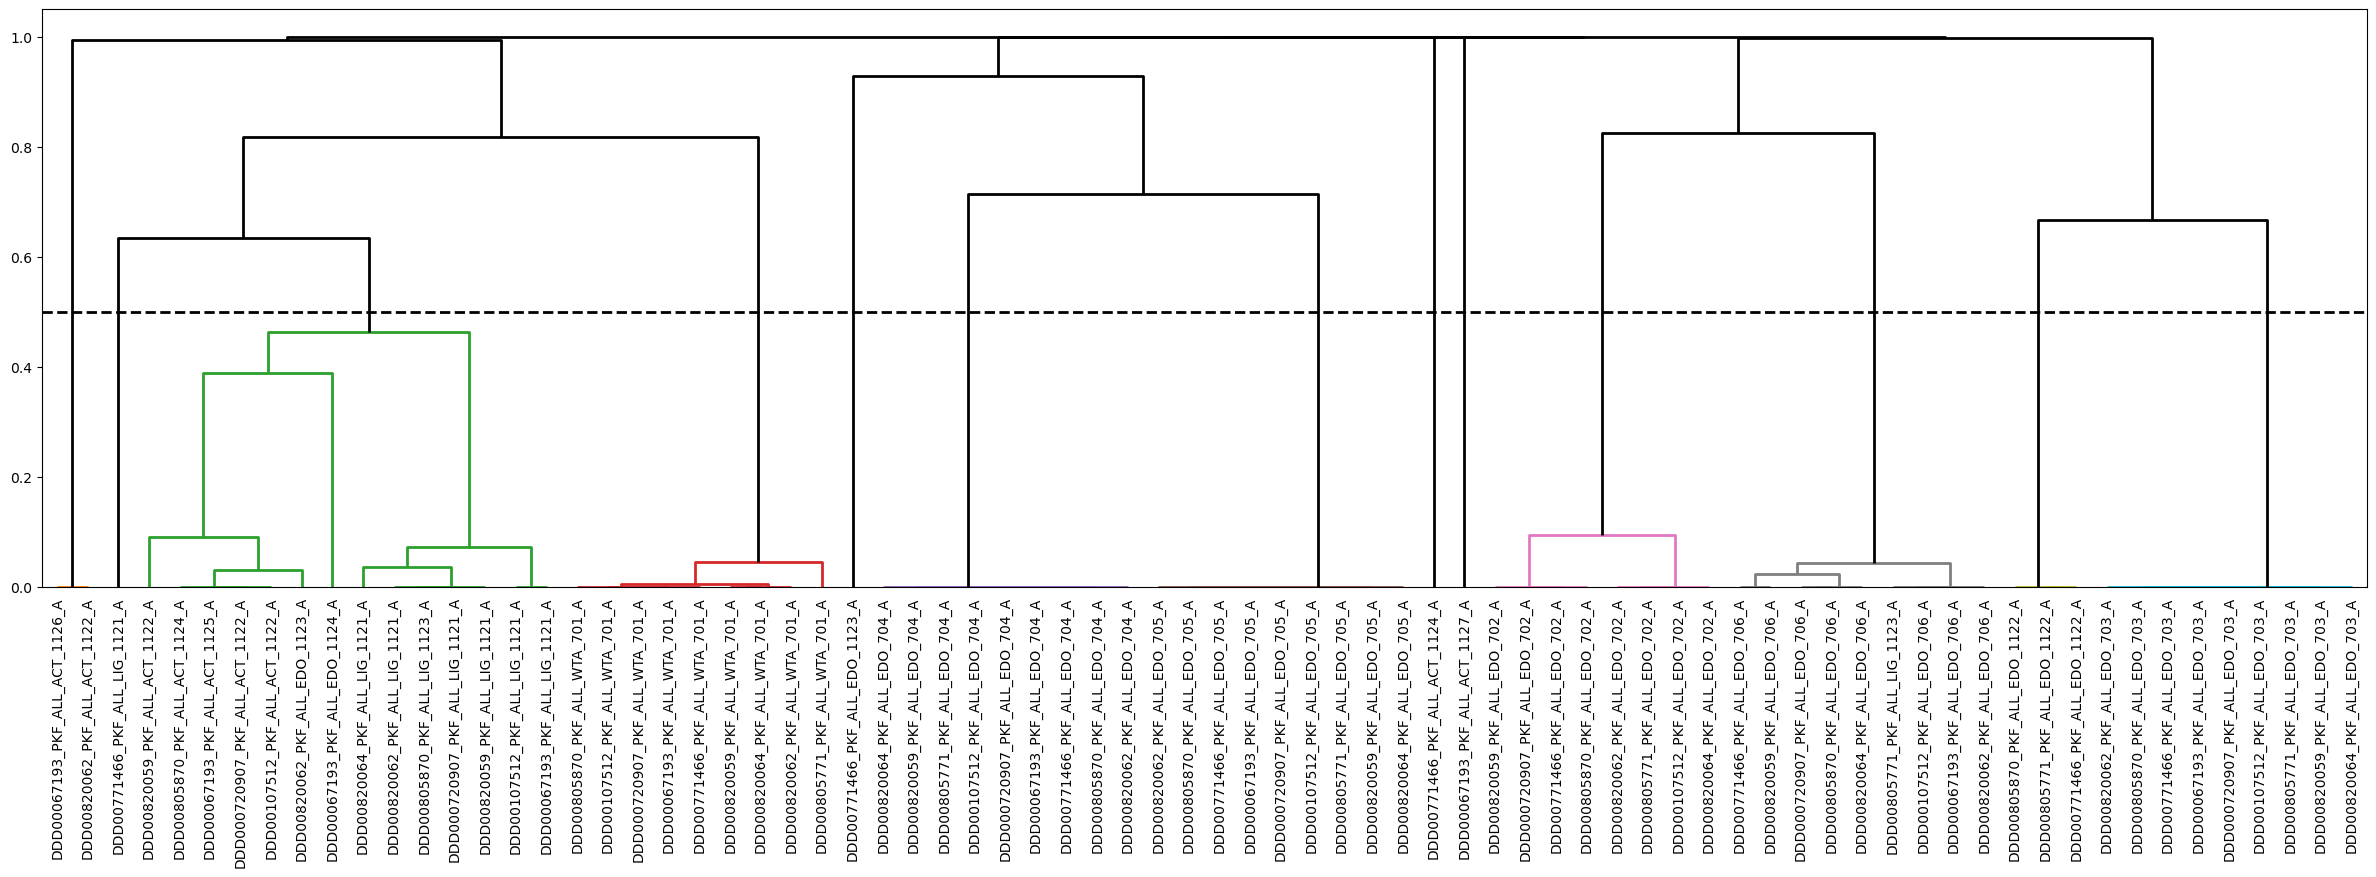

In [20]:
fig = plt.figure(figsize=(30, 7.5), dpi = 100)
matplotlib.rcParams['lines.linewidth'] = 2
dd = scipy.cluster.hierarchy.dendrogram(linkage, labels = labs, leaf_font_size = 10, color_threshold = clust_dist, above_threshold_color = "k")
# = [cluster_id_dict[d] for d in dd["ivl"]]
# = sorted(set(x), key=x.index)
#ols_list = [sample_colors[i] for i in x]
#cipy.cluster.hierarchy.set_link_color_palette(cols_list)

#[site_cluster_dict[k] for k in dd["ivl"]]
#if out != None:
#    plt.savefig(out)
    #print("Figure was successfully saved!")
#plt.ylim(0,20)
plt.axhline(y=clust_dist, c = "k", linestyle = "--")
#plt.ylim(-0.1)
plt.show()

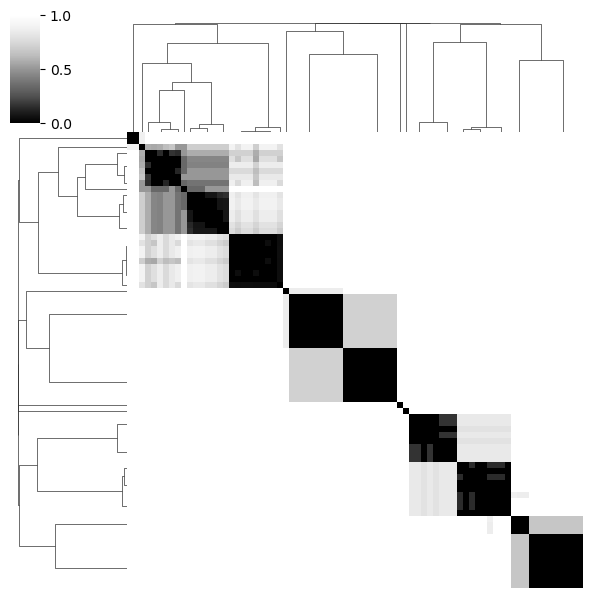

In [21]:
sns.clustermap(rel_dist_df, xticklabels = False, yticklabels = False, row_linkage=linkage, col_linkage=linkage, figsize=(6,6), cmap = "Greys_r")
#plt.savefig('./figs/fig_name.png', dpi = 600)
plt.show()

## Results table analysis

In [22]:
print("Minimum occupancy: {}".format(results_df.occ.min()))
print("Average occupancy: {}".format(round(results_df.occ.mean())))
print("Maximum occupancy: {}".format(results_df.occ.max()))

Minimum occupancy: 1
Average occupancy: 1050
Maximum occupancy: 1353


In [23]:
print("Minimum HUMAN occupancy: {}".format(results_df.human_occ.min()))
print("Average HUMAN occupancy: {}".format(round(results_df.human_occ.mean())))
print("Maximum HUMAN occupancy: {}".format(results_df.human_occ.max()))

Minimum HUMAN occupancy: 0
Average HUMAN occupancy: 25
Maximum HUMAN occupancy: 33


## Conservation & occupancy on target sequence (FULL MSA)

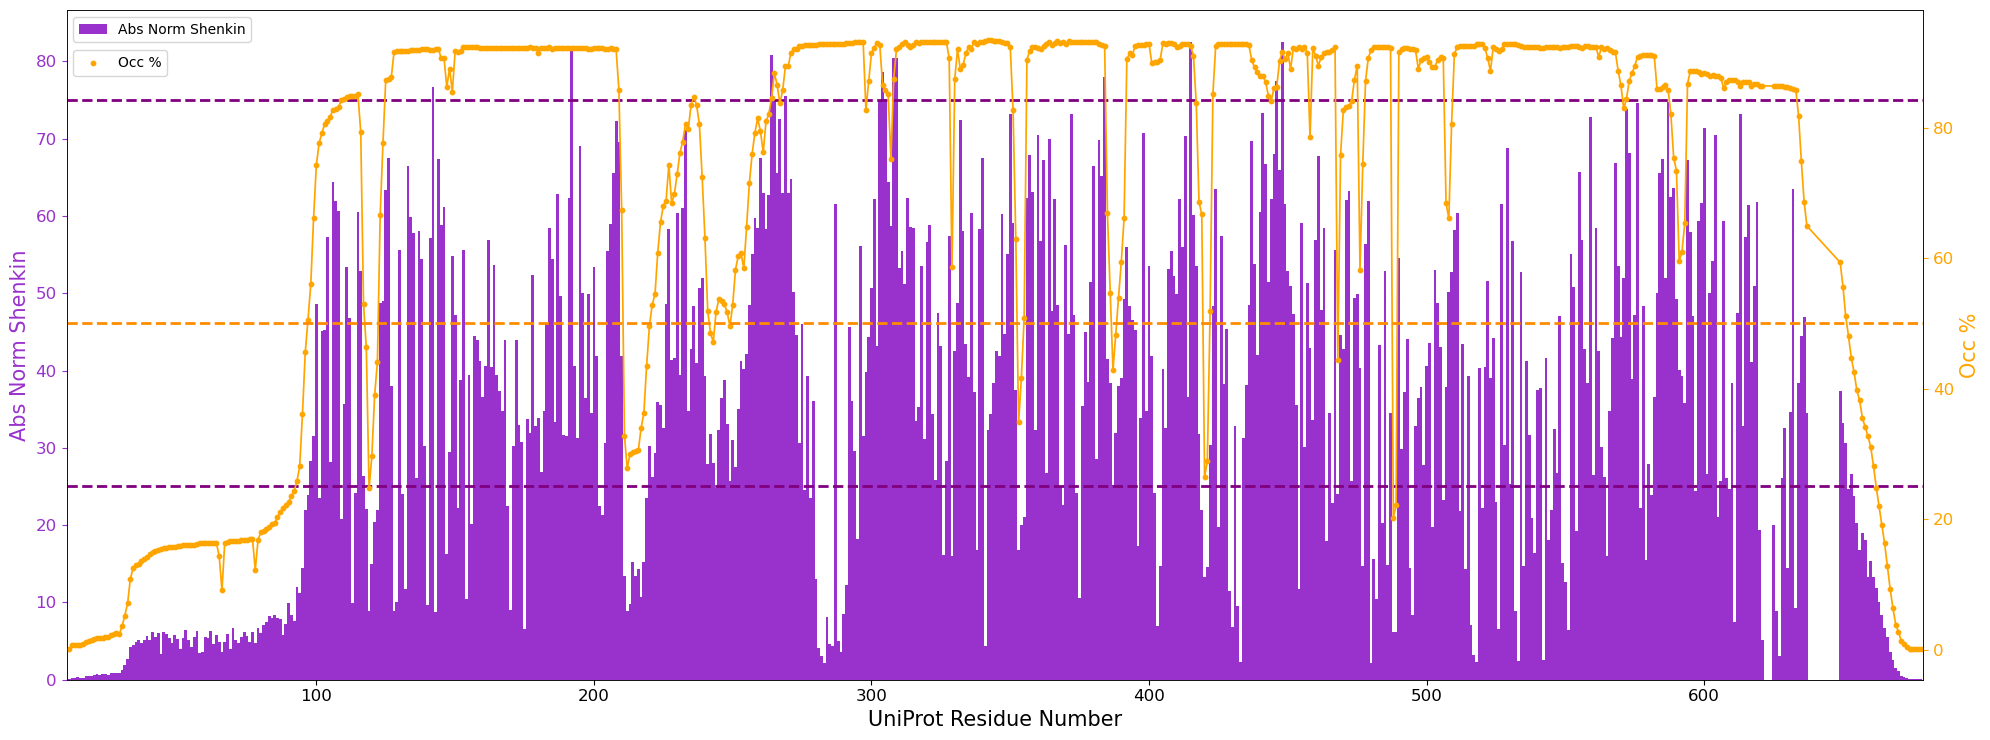

In [24]:
# Create the figure and the first axis (ax1)

plt.rcParams.update({"axes.linewidth": 0.5})

fig, ax1 = plt.subplots(figsize=(20, 7.5))

# Plot a barplot on ax1
ax1.bar(results_df['UniProt_ResNum'], results_df['abs_norm_shenkin'], color='darkorchid', label='Abs Norm Shenkin', width = 1)

# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_xlabel('UniProt Residue Number', fontsize = 15)
ax1.set_ylabel('Abs Norm Shenkin', color='darkorchid', fontsize = 15)
ax1.tick_params('x', colors='k', labelsize=12)
ax1.tick_params('y', colors='darkorchid', labelsize=12)
ax1.axhline(y = 25, linestyle = '--', c = 'purple')
ax1.axhline(y = 75, linestyle = '--', c = 'purple')
# Create the second axis (ax2) based on the first axis (ax1)
ax2 = ax1.twinx()

# Plot a scatterplot + lineplot on ax2
ax2.scatter(results_df['UniProt_ResNum'], results_df['occ_pct'], color='orange', marker='o', label='Occ %', s = 10)
ax2.plot(results_df['UniProt_ResNum'], results_df['occ_pct'], color='orange', linewidth = 1.25)

# Make the y-axis label, ticks and tick labels match the line color.
ax2.set_ylabel('Occ %', color='orange', fontsize = 15)
ax2.tick_params('y', colors='orange', labelsize=12)
ax2.axhline(y = 50, linestyle = '--', c = 'darkorange')

plt.xlim(results_df.UniProt_ResNum.min() - 1, results_df.UniProt_ResNum.max() + 1)

# Create legends
ax1.legend(loc='upper left', bbox_to_anchor=(0.0, 1.0))
ax2.legend(loc='upper left', bbox_to_anchor=(0.0, 0.95))

# Show the plot
fig.tight_layout()
plt.show()


## Conservation & occupancy on target sequence (HUMAN MSA)

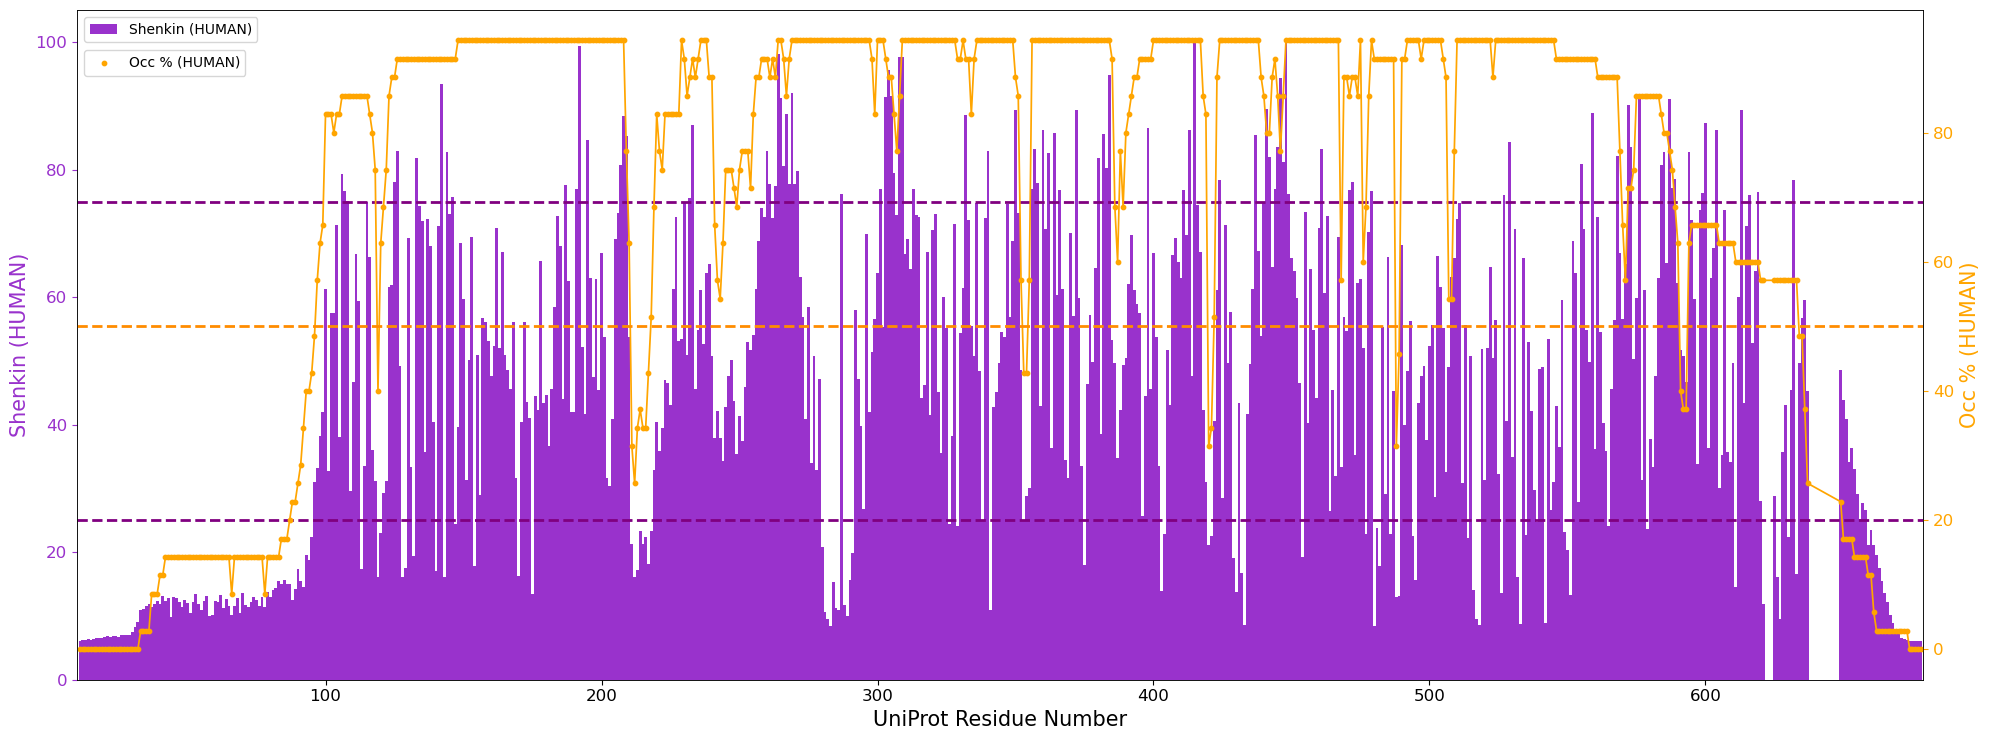

In [25]:
# Create the figure and the first axis (ax1)

plt.rcParams.update({"axes.linewidth": 0.5})

fig, ax1 = plt.subplots(figsize=(20, 7.5))

# Plot a barplot on ax1
ax1.bar(results_df['UniProt_ResNum'], results_df['human_shenkin'], color='darkorchid', label='Shenkin (HUMAN)', width = 1)

# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_xlabel('UniProt Residue Number', fontsize = 15)
ax1.set_ylabel('Shenkin (HUMAN)', color='darkorchid', fontsize = 15)
ax1.tick_params('x', colors='k', labelsize=12)
ax1.tick_params('y', colors='darkorchid', labelsize=12)
ax1.axhline(y = 25, linestyle = '--', c = 'purple')
ax1.axhline(y = 75, linestyle = '--', c = 'purple')
# Create the second axis (ax2) based on the first axis (ax1)
ax2 = ax1.twinx()

# Plot a scatterplot + lineplot on ax2
ax2.scatter(results_df['UniProt_ResNum'], results_df['human_occ_pct'], color='orange', marker='o', label='Occ % (HUMAN)', s = 10)
ax2.plot(results_df['UniProt_ResNum'], results_df['human_occ_pct'], color='orange', linewidth = 1.25)

# Make the y-axis label, ticks and tick labels match the line color.
ax2.set_ylabel('Occ % (HUMAN)', color='orange', fontsize = 15)
ax2.tick_params('y', colors='orange', labelsize=12)
ax2.axhline(y = 50, linestyle = '--', c = 'darkorange')

plt.xlim(results_df.UniProt_ResNum.min() - 1, results_df.UniProt_ResNum.max() + 1)

# Create legends
ax1.legend(loc='upper left', bbox_to_anchor=(0.0, 1.0))
ax2.legend(loc='upper left', bbox_to_anchor=(0.0, 0.95))

# Show the plot
fig.tight_layout()
plt.show()


### Binding sites analysis

In [26]:
binding_ress_df = results_df.query('binding_sites == binding_sites').copy()

In [27]:
binding_ress_df = binding_ress_df.explode("binding_sites")

In [28]:
un_bss = sorted(binding_ress_df.binding_sites.unique().tolist())

In [29]:
results_df.columns

Index(['UniProt_ResNum', 'alignment_column', 'shenkin', 'occ', 'gaps',
       'occ_pct', 'gaps_pct', 'rel_norm_shenkin', 'abs_norm_shenkin',
       'human_shenkin', 'human_occ', 'human_gaps', 'human_occ_pct',
       'human_gaps_pct', 'variants', 'oddsratio', 'pvalue', 'se_OR', 'AA',
       'RSA', 'SS', 'binding_sites'],
      dtype='object')

In [30]:
sizes, occs, shenks, hum_occs, hum_shenks, ORs, RSAs = [[], [], [], [], [], [], []]
for bs in un_bss:  
    bs_df = binding_ress_df.query('binding_sites == @bs')
    sizes.append(len(bs_df))
    occs.append(bs_df.occ_pct.mean())
    shenks.append(bs_df.abs_norm_shenkin.mean())
    hum_occs.append(bs_df.human_occ_pct.mean())
    hum_shenks.append(bs_df.human_shenkin.mean())
    ORs.append(bs_df.oddsratio.mean())
    RSAs.append(bs_df.RSA.mean())

bss_df = pd.DataFrame(
    zip(un_bss, sizes, occs, shenks, hum_occs, hum_shenks, ORs, RSAs),
    columns=[
        "bs_id", "size", "occ_pct", "abs_norm_shenk", "human_occ_pct",
        "human_shenk", "OR", "RSA"
    ]
).round(2)
bss_df["color"] = bss_df.bs_id.map(sample_colors_dict)

In [31]:
bss_df

,bs_id,size,occ_pct,abs_norm_shenk,human_occ_pct,human_shenk,OR,RSA,color
0,0,24,89.64,39.13,92.27,50.61,0.85,19.19,#e6194b
1,1,8,78.44,42.46,81.43,54.41,1.23,21.61,#3cb44b
2,2,6,68.62,47.50,81.90,60.15,1.07,38.60,#ffe119
3,3,3,18.98,6.51,19.05,13.42,2.28,49.79,#4363d8
4,4,8,84.96,49.72,91.43,62.68,0.99,17.16,#f58231
5,5,7,90.08,46.90,91.84,59.46,1.02,23.97,#911eb4
6,6,12,56.02,31.54,56.19,41.96,0.86,22.78,#46f0f0
7,7,25,92.20,19.96,94.29,28.75,0.99,14.48,#f032e6
8,8,7,26.00,16.01,24.49,24.25,0.88,24.31,#bcf60c
9,9,15,75.98,41.81,80.96,53.66,0.91,1.79,#fabebe


### Average Missense enrichment vs divergence per site

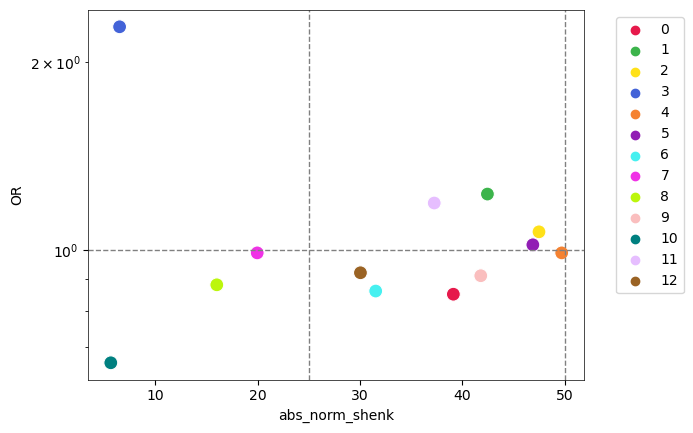

In [32]:
sns.scatterplot(
    data = bss_df,
    x = "abs_norm_shenk",
    y = "OR",
    hue = "bs_id",
    palette = bss_df["color"].tolist(),
    s = 100
)
plt.yscale('log')
plt.axhline(y=1, linestyle = "--", lw = 1, c = "gray")
plt.axvline(x = 25, linestyle = "--", lw = 1, c = "gray")
plt.axvline(x = 50, linestyle = "--", lw = 1, c = "gray")

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

In [33]:
print(binding_ress_df.oddsratio.min())
print(binding_ress_df.oddsratio.max())

print(binding_ress_df.abs_norm_shenkin.min())
print(binding_ress_df.abs_norm_shenkin.max())

0.0
4.18
2.28
80.49


In [34]:
binding_ress_df.query('oddsratio == 0')

,UniProt_ResNum,alignment_column,shenkin,occ,gaps,occ_pct,gaps_pct,rel_norm_shenkin,abs_norm_shenkin,human_shenkin,...,human_occ_pct,human_gaps_pct,variants,oddsratio,pvalue,se_OR,AA,RSA,SS,binding_sites
48,59,59,10.11,237,1212,16.36,83.64,4.34,3.61,10.11,...,14.29,85.71,0,0.0,0.17,2.90,W,2.20,H,9
55,66,67,10.14,132,1317,9.11,90.89,4.37,3.63,10.14,...,8.57,91.43,0,0.0,0.56,2.96,L,7.52,H,6
62,73,82,12.25,243,1206,16.77,83.23,6.61,5.48,12.25,...,14.29,85.71,0,0.0,0.17,2.90,F,3.44,C,10
65,76,88,11.57,245,1204,16.91,83.09,5.89,4.89,11.57,...,14.29,85.71,0,0.0,0.17,2.90,T,6.96,E,10


### Inspecting binding site ligand membership

In [36]:
bs_ligs_dict = {bs_id: sorted(bs_rows.lig_name.tolist()) for bs_id, bs_rows in bs_def_df.groupby("binding_site")}

In [37]:
for k, v in bs_ligs_dict.items():
    print("{}: {}".format(k, v))

0: ['ACT', 'ACT', 'ACT', 'ACT', 'ACT', 'EDO', 'EDO', 'LIG', 'LIG', 'LIG', 'LIG', 'LIG', 'LIG', 'LIG']
1: ['ACT', 'ACT']
2: ['ACT']
3: ['EDO', 'EDO', 'EDO', 'EDO', 'EDO', 'EDO', 'EDO', 'EDO', 'EDO']
4: ['EDO', 'EDO', 'EDO', 'EDO', 'EDO', 'EDO', 'EDO', 'EDO', 'EDO']
5: ['EDO', 'EDO', 'EDO', 'EDO', 'EDO', 'EDO', 'EDO', 'EDO', 'EDO']
6: ['EDO', 'EDO', 'EDO', 'EDO', 'EDO', 'EDO', 'EDO', 'EDO', 'LIG']
7: ['WTA', 'WTA', 'WTA', 'WTA', 'WTA', 'WTA', 'WTA', 'WTA', 'WTA']
8: ['EDO', 'EDO', 'EDO', 'EDO', 'EDO', 'EDO', 'EDO', 'EDO']
9: ['ACT']
10: ['EDO', 'EDO', 'EDO']
11: ['EDO']
12: ['LIG']


In [38]:
binding_ress_df.query('binding_sites == 6 & abs_norm_shenkin > 50 & oddsratio < 1')

,UniProt_ResNum,alignment_column,shenkin,occ,gaps,occ_pct,gaps_pct,rel_norm_shenkin,abs_norm_shenkin,human_shenkin,...,human_occ_pct,human_gaps_pct,variants,oddsratio,pvalue,se_OR,AA,RSA,SS,binding_sites
296,307,859,72.87,1090,359,75.22,24.78,71.08,58.66,72.87,...,77.14,22.86,7,0.49,0.10,0.83,K,17.72,H,6
328,339,968,72.50,1350,99,93.17,6.83,70.69,58.33,72.50,...,94.29,5.71,12,0.69,0.35,0.66,L,0.00,H,6
329,340,969,82.96,1350,99,93.17,6.83,81.81,67.51,82.96,...,94.29,5.71,10,0.57,0.15,0.71,L,17.21,H,6


In [39]:
binding_ress_df.query('binding_sites == 12 & pvalue < 0.1')

,UniProt_ResNum,alignment_column,shenkin,occ,gaps,occ_pct,gaps_pct,rel_norm_shenkin,abs_norm_shenkin,human_shenkin,...,human_occ_pct,human_gaps_pct,variants,oddsratio,pvalue,se_OR,AA,RSA,SS,binding_sites
531,542,1680,8.85,1337,112,92.27,7.73,3.00,2.50,8.85,...,94.29,5.71,8,0.46,0.05,0.77,G,32.01,T,12
533,544,1685,26.60,1338,111,92.34,7.66,21.88,18.07,26.60,...,94.29,5.71,32,1.84,0.02,0.49,R,14.38,E,12


### Plotting Missense enrichment vs Divergence for each site

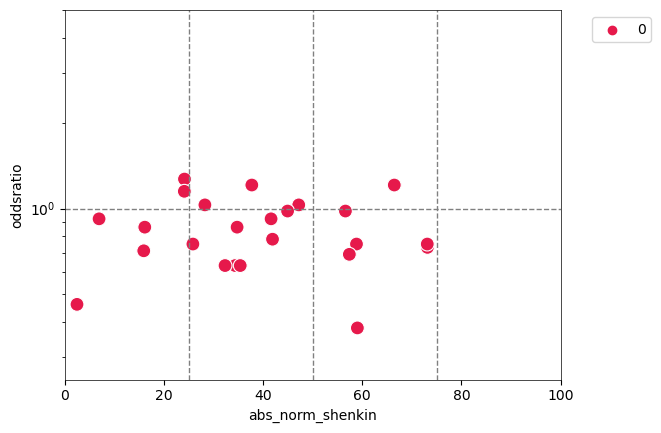

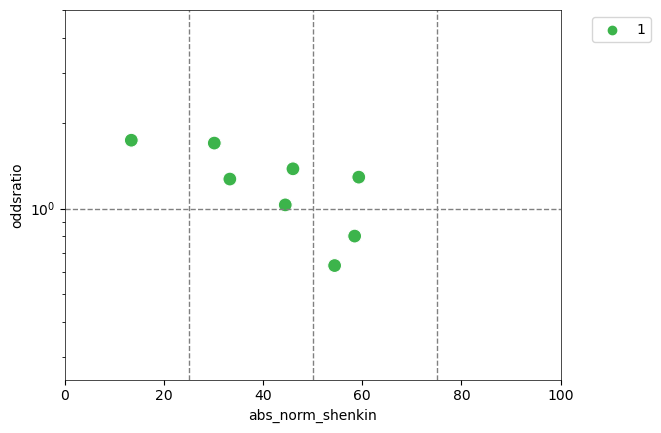

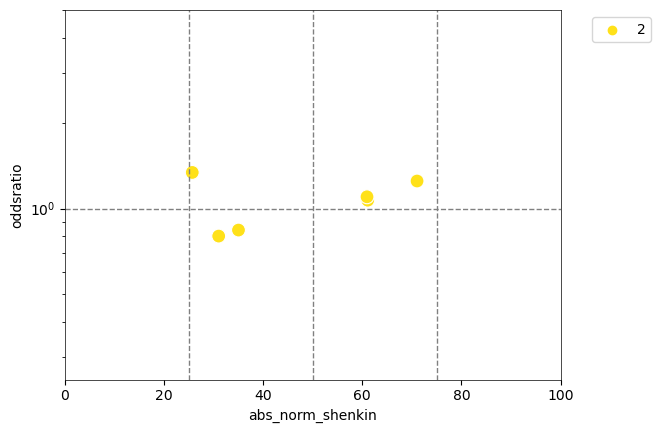

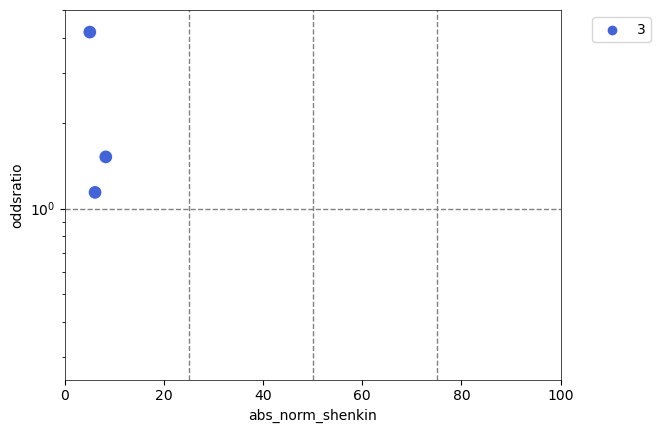

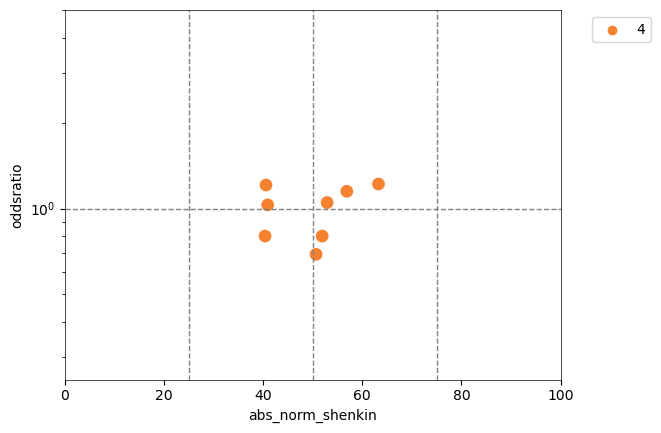

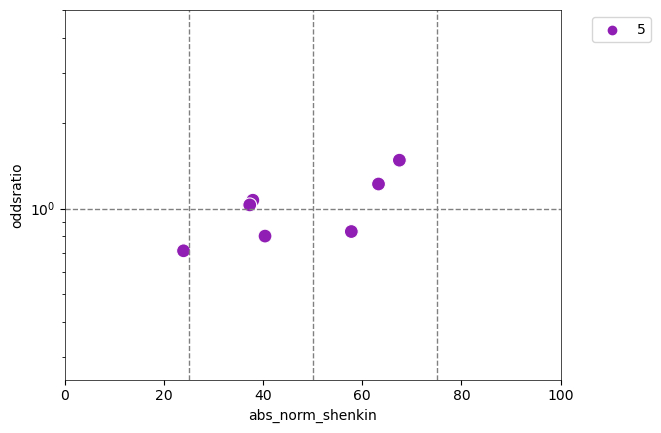

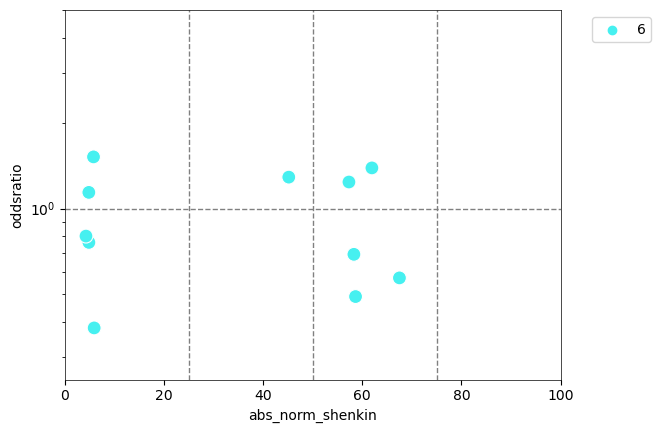

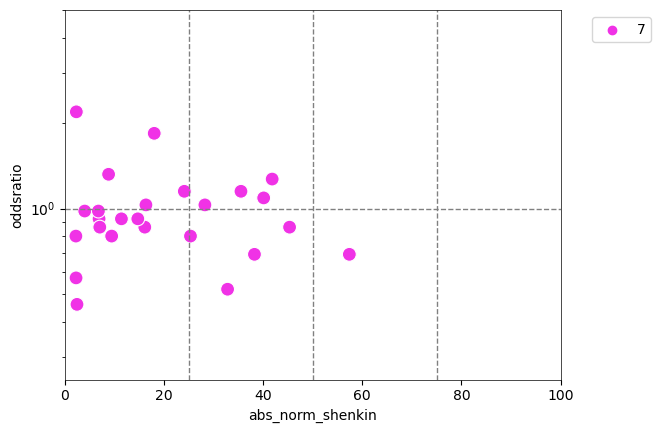

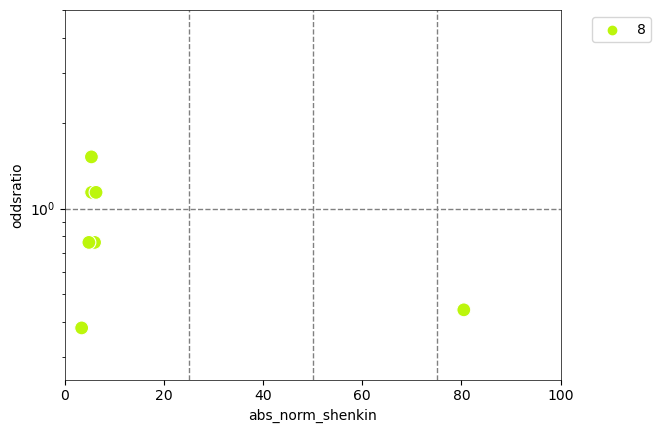

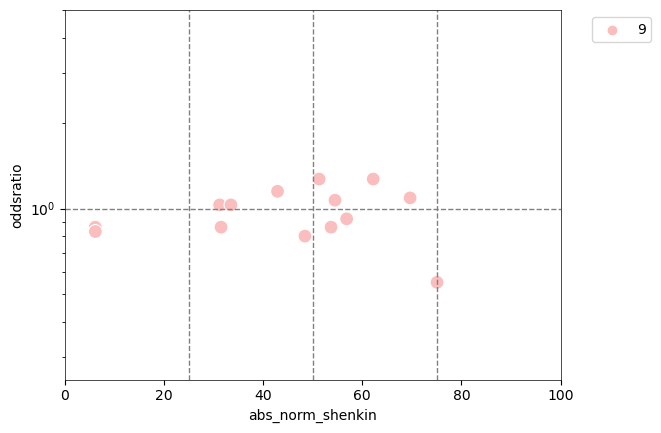

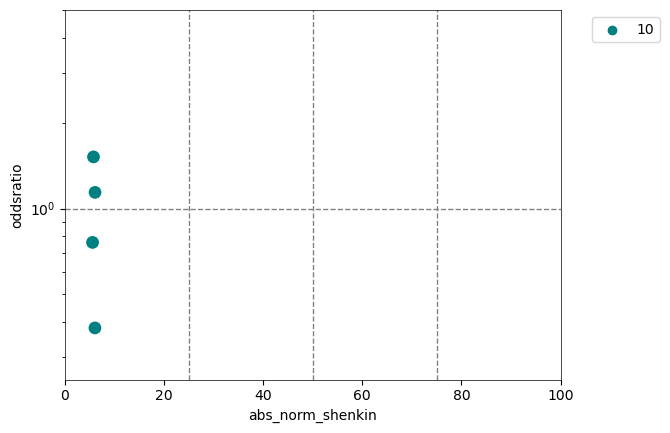

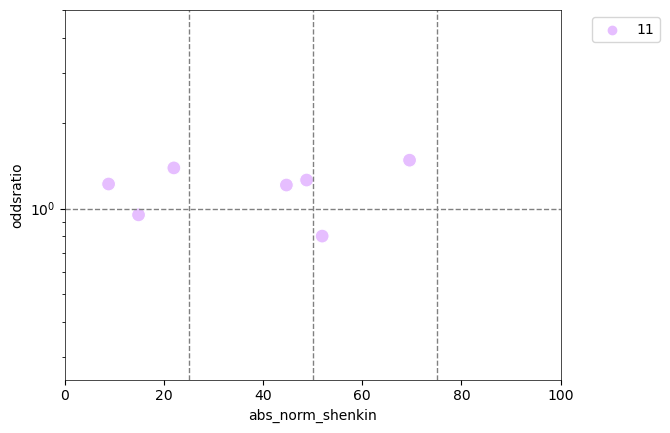

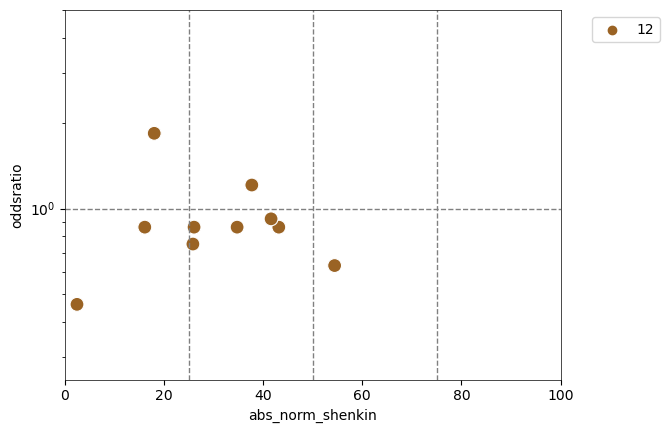

In [40]:
for bs in un_bss:  
    bs_df = binding_ress_df.query('binding_sites == @bs')
    sns.scatterplot(
        data = bs_df,
        x = "abs_norm_shenkin",
        y = "oddsratio",
        hue = "binding_sites",
        palette = [sample_colors[bs]],
        s = 100
    )
    #print([sample_colors[bs] for i in range(len(bs_df))])
    plt.yscale('log')
    plt.axhline(y=1, linestyle = "--", lw = 1, c = "gray")
    plt.axvline(x = 25, linestyle = "--", lw = 1, c = "gray")
    plt.axvline(x = 50, linestyle = "--", lw = 1, c = "gray")
    plt.axvline(x = 75, linestyle = "--", lw = 1, c = "gray")
    
    plt.xlim(0,100)
    plt.ylim(2.5*pow(10,-1), 5*pow(10,0))

    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.show()

## FUNCTIONAL SCORE PER SITE

In [41]:
rsa_profs_dict

{0: [14.38,
  49.24,
  1.07,
  28.31,
  27.12,
  14.66,
  21.44,
  6.44,
  14.24,
  0.0,
  19.01,
  12.25,
  4.85,
  0.25,
  3.6,
  25.16,
  17.61,
  13.94,
  36.65,
  8.69,
  51.98,
  34.53,
  32.01,
  23.25],
 1: [0.25, 17.51, 32.41, 5.75, 9.91, 34.45, 25.44, 47.14],
 2: [32.49, 60.56, 9.48, 95.24, 15.23, 18.63],
 3: [47.8, 77.51, 24.07],
 4: [6.66, 42.97, 0.33, 0.0, 6.13, 18.56, 40.38, 22.22],
 5: [42.97, 47.78, 2.89, 47.94, 18.21, 6.13, 1.86],
 6: [48.57,
  62.99,
  7.52,
  3.22,
  45.23,
  17.65,
  5.92,
  47.36,
  17.72,
  0.0,
  17.21,
  0.0],
 7: [5.95,
  21.44,
  6.44,
  14.24,
  0.0,
  8.69,
  51.98,
  15.98,
  48.04,
  7.77,
  0.78,
  9.06,
  9.54,
  6.45,
  9.94,
  0.92,
  1.57,
  2.03,
  7.16,
  17.55,
  27.65,
  22.76,
  19.67,
  32.01,
  14.38],
 8: [34.77, 14.77, 0.34, 41.31, 4.43, 62.99, 11.56],
 9: [2.2,
  0.0,
  3.31,
  0.0,
  0.0,
  3.08,
  0.66,
  0.7,
  2.48,
  0.79,
  5.42,
  1.97,
  1.96,
  1.96,
  2.39],
 10: [37.7, 9.01, 48.57, 3.44, 77.51, 49.43, 6.96, 15.28]

In [45]:
max_len = max([len(v) for v in rsa_profs_dict.values()])
bs_vectors = []
bs_vectors_dict = {}
for bs_id, rsa_sig in rsa_profs_dict.items():
    rsa_sig_len = len(rsa_sig)
    rsa_range_prop = [0 for i in range(10)] # now let us change to 10
    for rsa in rsa_sig:
        prop_i = int(rsa/10) # 10 RSA BINS: b1 = [0,10), b2 = [10, 20), ... b10 = [90, MAX)
        if prop_i > 9: # if greater than 100, put in 10th bin
            prop_i = 9
        #print(prop_i)
        rsa_range_prop[prop_i] += 1
    rsa_range_prop = [round(i/rsa_sig_len, 3) for i in rsa_range_prop]
    rsa_range_prop.insert(0, rsa_sig_len/max_len) # ADDING BINDING SITE SIZE RELATIVE TO MAX SITE SIZE (IN THIS CASE 40)
    bs_vectors.append(rsa_range_prop)
    bs_vectors_dict[bs_id] = rsa_range_prop
    
vector_df = pd.DataFrame(bs_vectors, index = list(rsa_profs_dict.keys())) # obtaining RSA vectors, which are the 11-element features used for the machine learning

In [46]:
vector_df

,0,1,2,3,4,5,6,7,8,9,10
0,0.96,0.292,0.292,0.208,0.125,0.042,0.042,0.000,0.000,0.0,0.000
1,0.32,0.375,0.125,0.125,0.250,0.125,0.000,0.000,0.000,0.0,0.000
2,0.24,0.167,0.333,0.000,0.167,0.000,0.000,0.167,0.000,0.0,0.167
3,0.12,0.000,0.000,0.333,0.000,0.333,0.000,0.000,0.333,0.0,0.000
4,0.32,0.500,0.125,0.125,0.000,0.250,0.000,0.000,0.000,0.0,0.000
5,0.28,0.429,0.143,0.000,0.000,0.429,0.000,0.000,0.000,0.0,0.000
6,0.48,0.417,0.250,0.000,0.000,0.250,0.000,0.083,0.000,0.0,0.000
7,1.00,0.560,0.200,0.120,0.040,0.040,0.040,0.000,0.000,0.0,0.000
8,0.28,0.286,0.286,0.000,0.143,0.143,0.000,0.143,0.000,0.0,0.000
9,0.60,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.000


In [48]:
import keras

2023-09-11 15:20:26.500135: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [50]:
model_path = "/homes/2394007/JSU_LIGYSIS/ANN_results/diff_seeds/85406/models/85406_4_model_epoch_75_train_acc_0.88.h5"
final_model = keras.models.load_model(model_path)
final_preds = final_model.predict(x = vector_df, batch_size = 27, verbose = 0)
rounded_predictions = np.argmax(final_preds, axis = -1)

In [57]:
prop_func_dict = {0:0.58, 1: 0.18, 2:0.05, 3:0.04}

In [60]:
site_func_score_dict = {}
for i, el in enumerate(final_preds):
    site_func_score_dict[i] = 0
    for o, e in enumerate(el):
        site_func_score_dict[i] += e*prop_func_dict[o]
    #print([round(e,6) for e in el])
    
site_func_score_dict = {k: round(v, 4) for k, v in site_func_score_dict.items()}

In [61]:
site_func_score_dict

{0: 0.5796,
 1: 0.5794,
 2: 0.217,
 3: 0.0612,
 4: 0.5799,
 5: 0.5762,
 6: 0.5797,
 7: 0.58,
 8: 0.5617,
 9: 0.58,
 10: 0.4879,
 11: 0.5781,
 12: 0.5799}

In [67]:
bss_df["rsa_cluster"] = [el + 1 for el in list(rounded_predictions)]
bss_df["func_score"] = bss_df.bs_id.map(site_func_score_dict)

In [68]:
bss_df

,bs_id,size,occ_pct,abs_norm_shenk,human_occ_pct,human_shenk,OR,RSA,color,rsa_cluster,func_score
0,0,24,89.64,39.13,92.27,50.61,0.85,19.19,#e6194b,1,0.5796
1,1,8,78.44,42.46,81.43,54.41,1.23,21.61,#3cb44b,1,0.5794
2,2,6,68.62,47.50,81.90,60.15,1.07,38.60,#ffe119,2,0.2170
3,3,3,18.98,6.51,19.05,13.42,2.28,49.79,#4363d8,3,0.0612
4,4,8,84.96,49.72,91.43,62.68,0.99,17.16,#f58231,1,0.5799
5,5,7,90.08,46.90,91.84,59.46,1.02,23.97,#911eb4,1,0.5762
6,6,12,56.02,31.54,56.19,41.96,0.86,22.78,#46f0f0,1,0.5797
7,7,25,92.20,19.96,94.29,28.75,0.99,14.48,#f032e6,1,0.5800
8,8,7,26.00,16.01,24.49,24.25,0.88,24.31,#bcf60c,1,0.5617
9,9,15,75.98,41.81,80.96,53.66,0.91,1.79,#fabebe,1,0.5800
